The following notebook contains solution to PartI of the Assignment two.

#### Part I. Model Evaluation with Nearest Neighbor Classifier
In Part I, you will conduct a machine learning experiment with k-Nearest Neighbor classifier and assess
various model performance metrics.

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy.spatial import Voronoi, voronoi_plot_2d


0. Downloading the toydata.csv

1. Data Exploration:

1. a) Load the given dataset:

In [107]:
data = pd.read_csv("toydata.csv") # 1. (a)

1. (b) Visualize the dataset using a scatter plot distinguishing data points by color (e.g., ‘blue’, ‘green’)
according to their class label:  

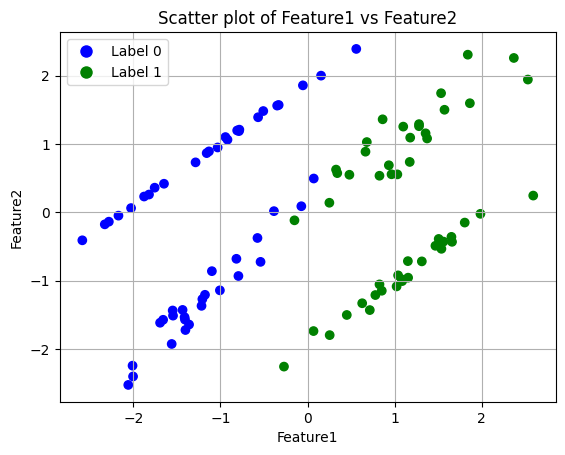

In [108]:
# 1. (b)
colors = ['blue' if label == 0 else 'green' for label in data['Label']]

plt.scatter(data['Feature1'], data['Feature2'], c=colors)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot of Feature1 vs Feature2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10)],
           labels=['Label 0', 'Label 1'])
plt.grid(True)
plt.show()

1. (c) Exhibit the first few rows of the dataset:

In [109]:
# 1 (c)
data.head(7) #prints first seven rows of the dataset.

,Feature1,Feature2,Label
0,0.559426,2.388694,0
1,1.312175,-0.717315,1
2,-1.559849,-1.924874,0
3,-2.281386,-0.136856,0
4,1.560704,-0.427958,1
5,-0.808045,1.196641,0
6,-0.270624,-2.255540,1


1. (d) Present basic statistics of the descriptive features within the dataset.


In [110]:
# 1 (d)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  100 non-null    float64
 1   Feature2  100 non-null    float64
 2   Label     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [111]:
data.describe() 
#actual answer that shows stats for continous data in dataset.

,Feature1,Feature2,Label
count,100.000000,100.000000,100.000000
mean,-0.027714,-0.048848,0.500000
std,1.323957,1.230126,0.502519
min,-2.585909,-2.523434,0.000000
25%,-1.185113,-1.097573,0.000000
50%,0.069846,-0.035241,0.500000
75%,1.089659,1.035708,1.000000
max,2.591239,2.388694,1.000000


2. Data Prepatation:

2. (f) Standardize the descriptive features in both the training and test sets, excluding the label feature. 

In [112]:
# 2. f. splitting the data: and standardizing features:
y = data["Label"]

X = np.column_stack((data['Feature1'], data['Feature2']))
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)


2. (e) Apply the holdout method to split the data, allocating 20% for testing and the remaining 80% for training. Ensure consistent splitting every time the code executes, by using, for example, “42” as the random seed value in Python

In [113]:
#2 e.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Classification

3. (g) Employ the k-Nearest Neighbor (k=1) classifier to predict the class label of test instances. Notice that the k-NN classifier does not have a training stage:

In [114]:
# 3. g.
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

3. (h) Show all test instances alongside their predicted classes, e.g., 

In [115]:
# 3. h.
predictions = knn.predict(X_test)

for i in range(len(X_test)):
    print("Instance: " + str(X_test[i])+", True Label: " + str(y_test.iloc[i]) +", Predicted Label: "+str(predictions[i]))


Instance: [-1.49983522 -1.9205709 ], True Label: 0, Predicted Label: 0
Instance: [0.85519578 1.06356381], True Label: 1, Predicted Label: 1
Instance: [1.21462556 1.26478557], True Label: 1, Predicted Label: 1
Instance: [-1.04331991 -1.36591304], True Label: 0, Predicted Label: 0
Instance: [ 0.84290389 -0.7609453 ], True Label: 1, Predicted Label: 1
Instance: [-0.27172867  0.05398724], True Label: 0, Predicted Label: 1
Instance: [-1.05065152 -1.21280653], True Label: 0, Predicted Label: 0
Instance: [-1.15138763 -1.19414095], True Label: 0, Predicted Label: 0
Instance: [1.98809177 0.23985476], True Label: 1, Predicted Label: 1
Instance: [0.44570826 1.99152121], True Label: 0, Predicted Label: 0
Instance: [ 1.16408032 -0.27807264], True Label: 1, Predicted Label: 1
Instance: [-0.01934545  1.55634448], True Label: 0, Predicted Label: 0
Instance: [1.4177452  1.92273355], True Label: 1, Predicted Label: 1
Instance: [-1.2378081  -1.24385139], True Label: 0, Predicted Label: 0
Instance: [-0.57

4. Model Evaluation

4. (i) Create a confusion matrix for the test data predictions. 

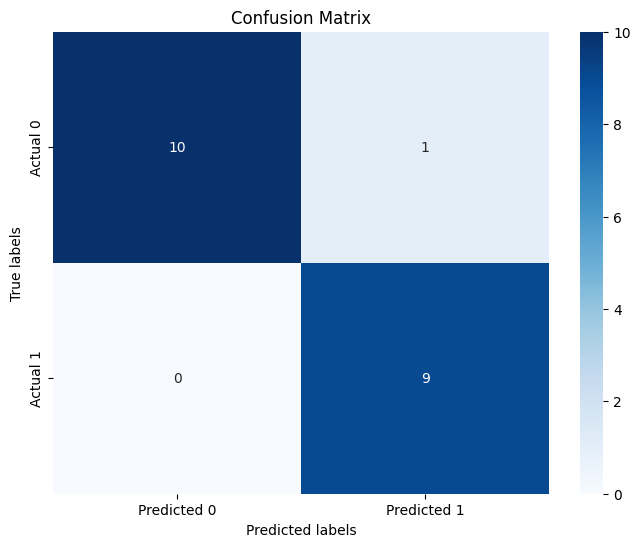

In [116]:
# 4 i.
cm = confusion_matrix(y_test, predictions)
tn = cm[0][0]
fp = cm[0][1]
tp = cm[1][1]
fn = cm[1][0]

# Display the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

4. (j) Display TP, TN, FP and FN values like the following: 

In [117]:
#4. j.
print("The True Positive (TP) value is: "+str(tp))
print("The True Negative (TN) value is: "+str(tn))
print("The False Positive (FP) value is: "+str(fp))
print("The False Negative (FN) value is: "+str(fn))

The True Positive (TP) value is: 9
The True Negative (TN) value is: 10
The False Positive (FP) value is: 1
The False Negative (FN) value is: 0


4. (k) Calculate various model performance metrics such as Accuracy, Misclassification Rate,
Precision, Recall and F1 score utilizing the TP, TN, FP and FN values. Display the performance
measure values like the following: 

In [118]:
#4. k.
accuracy = (tp + tn) / (tp + tn + fp + fn)
misclassification_rate = (fp + fn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)


print("Accuracy = "+str(accuracy*100) + "%")
print("Misclassification Rate = "+str(misclassification_rate*100) + " %")
print("Precision = " +str(precision * 100) +str("%"))
print("Recall = " +str(recall * 100) +str("%"))
print("F1 Score = " +str(f1_score * 100) +str("%"))

Accuracy = 95.0%
Misclassification Rate = 5.0 %
Precision = 90.0%
Recall = 100.0%
F1 Score = 94.73684210526316%


5. Visualization

5. (l) Generate a Voronoi diagram for the training data

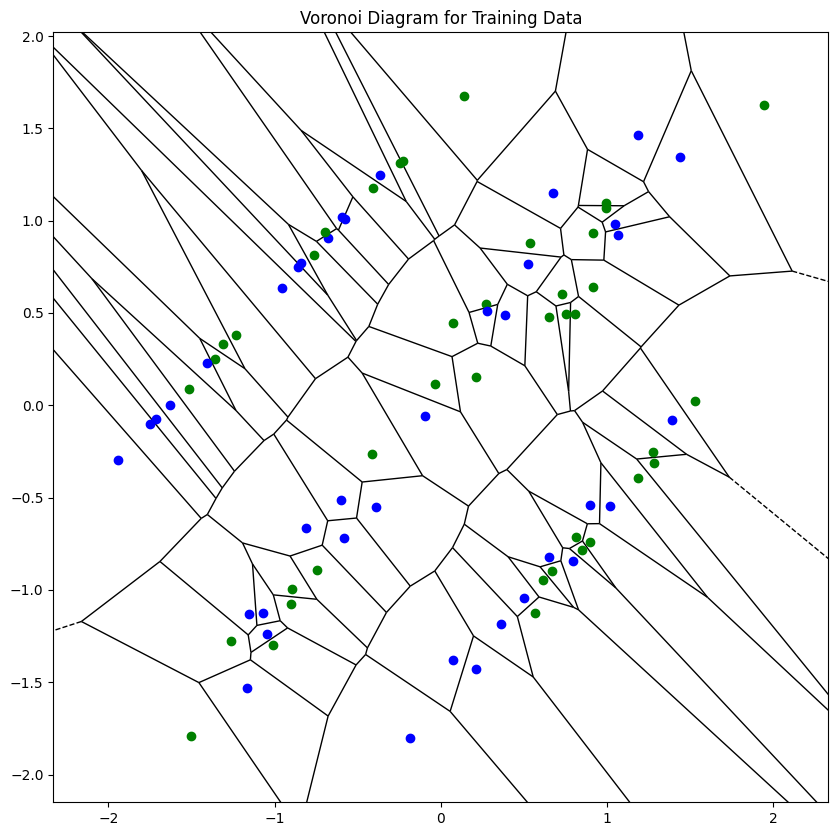

In [119]:
# 5. l
vor = Voronoi(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=True)

for i, point in enumerate(X_train):
    if data['Label'][i] == 0:
        ax.plot(point[0], point[1], 'o', color='blue')
    else:
        ax.plot(point[0], point[1], 'o', color='green')

plt.title('Voronoi Diagram for Training Data')
plt.show()

5. (m) Place the test data points, annotated with their class label, on the Voronoi diagram.

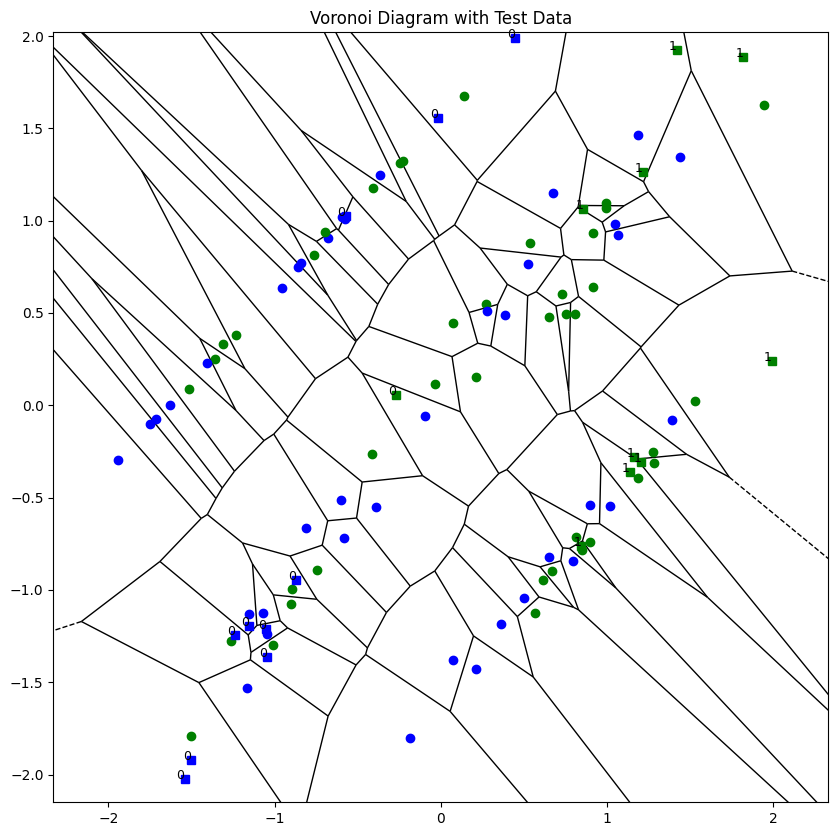

In [120]:
# 5. m.
vor = Voronoi(X_train)
fig, ax = plt.subplots(figsize=(10, 10))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, show_points=True)

for i, point in enumerate(X_train):
    if data['Label'][i] == 0:
        ax.plot(point[0], point[1], 'o', color='blue')
    else:
        ax.plot(point[0], point[1], 'o', color='green')
for i, point in enumerate(X_test):
    if predictions[i] == 0:
        ax.plot(point[0], point[1], 's', color='blue')  
        ax.annotate(str(y_test.iloc[i]), (point[0], point[1]), fontsize=9, ha='right')
    else:
        ax.plot(point[0], point[1], 's', color='green') 
        ax.annotate(str(y_test.iloc[i]), (point[0], point[1]), fontsize=9, ha='right')

plt.title('Voronoi Diagram with Test Data')
plt.show()
